In [1]:
# Import necessary libraries
import pandas as pd  # pandas is used for handling tabular datasets (dataframes) and performing operations such as reading CSV files
import numpy as np  # numpy is used for numerical computations such as working with arrays and applying mathematical operations

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/swetakoski/cyber_threats_data/refs/heads/main/Global_Cybersecurity_Threats_2015-2024.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset


Dataset Preview:
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2  

In [2]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [4]:
#check for any missing data
missing_values = df.isna().sum()  # Number of missing values per column
print(missing_values)

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [5]:
#which countries faced the highest financial losses
df.groupby('Country')['Financial Loss (in Million $)'].sum().sort_values(ascending=False) 

Country
UK           16502.99
Germany      15793.24
Brazil       15782.62
Australia    15403.00
Japan        15197.34
France       14972.28
USA          14812.12
Russia       14734.73
India        14566.12
China        13714.47
Name: Financial Loss (in Million $), dtype: float64

In [6]:
#calculate basic metric (mean, median, standard deviation) of Incident Resolution Time
mean_resol_time= df['Incident Resolution Time (in Hours)'].mean()
print(f"Mean Incident Resolution Time is: {mean_resol_time:.2f} hours ")

median_resol_time = np.median(df['Incident Resolution Time (in Hours)'])
print(f"Median of the Incident Resolution Time is : {median_resol_time: .2f} hours")

resol_time_std = df['Incident Resolution Time (in Hours)'].std()
print(f"The standard deviation of Incident Response Time is : {resol_time_std: .2f} hours")

Mean Incident Resolution Time is: 36.48 hours 
Median of the Incident Resolution Time is :  37.00 hours
The standard deviation of Incident Response Time is :  20.57 hours


In [7]:
#indentify trends (average values)
#average number of affected users per attack type

avrg_aff_urs_per_attck = df.groupby('Attack Type')['Number of Affected Users'].mean() 
print (f"The average number of affected users per attack type are: {avrg_aff_urs_per_attck:}")

The average number of affected users per attack type are: Attack Type
DDoS                 499437.410546
Malware              508780.232990
Man-in-the-Middle    520064.320261
Phishing             487179.536862
Ransomware           502825.369168
SQL Injection        512469.833002
Name: Number of Affected Users, dtype: float64


In [3]:
#Detect any unusual values or outliers.
q1_resol_time = df["Incident Resolution Time (in Hours)"].quantile(0.25)
q3_resol_time = df["Incident Resolution Time (in Hours)"].quantile(0.75)
iqr = q3_resol_time - q1_resol_time

# Define outlier bounds
lower_bound = q1_resol_time - 1.5 * iqr
upper_bound = q3_resol_time + 1.5 * iqr

outliers = df[(df['Incident Resolution Time (in Hours)'] < lower_bound) | (df['Incident Resolution Time (in Hours)'] > upper_bound)]

# Check if there are any outliers
if not outliers.empty:
    print("No unusual values or outliers detected:")
    print(outliers)
else:
    print("No outliers detected.")
    


No outliers detected.


In [13]:
#Perform a Time-Based Analysis
#Group data by Year and Financial Loos in that particular year
# Drop rows with null values
df_cleaned = df.dropna()

grouped_by_year = df_cleaned.groupby('Year').agg({
    'Financial Loss (in Million $)': 'sum'
     
}).reset_index()

# Display grouped data
print(grouped_by_year)

   Year  Financial Loss (in Million $)
0  2015                       14510.21
1  2016                       13947.26
2  2017                       16261.68
3  2018                       14720.48
4  2019                       13134.69
5  2020                       15767.95
6  2021                       15873.41
7  2022                       15870.86
8  2023                       15958.08
9  2024                       15434.29


In [18]:
#Identify trends, peaks, or seasonalpatterns.

#group the data by year and calculate the sum of financial losses and affected users


# Drop rows with null values
df_cleaned = df.dropna()

# Group by Year and sum financial losses and affected users
grouped_by_year = df_cleaned.groupby('Year').agg({
    'Financial Loss (in Million $)': 'sum',
    'Number of Affected Users': 'sum'
}).reset_index()

# Sort by Financial Loss and Affected Users to find the highest values
highest_financial_losses = grouped_by_year.sort_values(by='Financial Loss (in Million $)', ascending=False).head(1)
highest_affected_users = grouped_by_year.sort_values(by='Number of Affected Users', ascending=False).head(1)

# Display the years with the highest financial losses and affected users
print(f"🌍 Year with the highest financial loss:")
print(highest_financial_losses[['Year', 'Financial Loss (in Million $)']])

print(f"\n🌍 Year with the highest number of affected users:")
print(highest_affected_users[['Year', 'Number of Affected Users']])

🌍 Year with the highest financial loss:
   Year  Financial Loss (in Million $)
2  2017                       16261.68

🌍 Year with the highest number of affected users:
   Year  Number of Affected Users
7  2022                 163263160


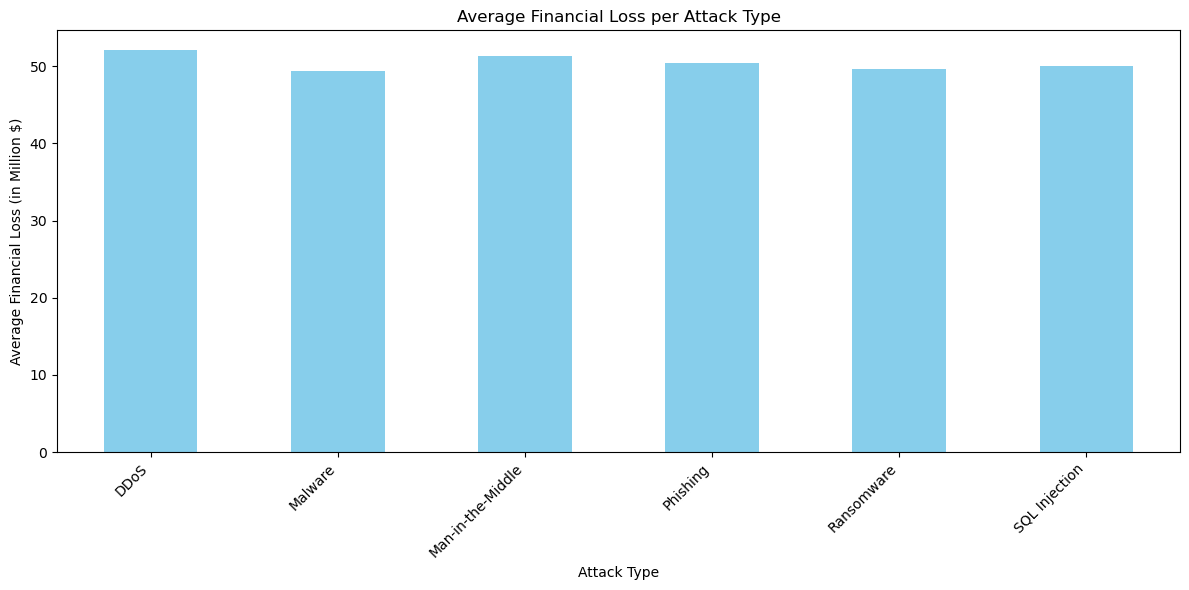

In [66]:
# Create meaningful graphs and charts to present insights.
avg_financial_loss_per_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
avg_financial_loss_per_attack.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Average Financial Loss per Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Financial Loss (in Million $)')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()
